# Part 2: Classifying fashion Mnist using artificial neural networks

In [ ]:
# pip install tensorflow

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, datasets, layers, optimizers

In [2]:
# https://keras.io/api/datasets/

#(X_train_full, y_train_full), (X_test, y_test) = datasets.mnist.load_data()

In [26]:
# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [27]:
X_train_full.shape

(60000, 28, 28)

In [28]:
X_test.shape

(10000, 28, 28)

In [29]:
X_train, X_valid = X_train_full[:50000], X_train_full[50000:]
y_train, y_valid = y_train_full[:50000], y_train_full[50000:]

In [30]:
X_train.shape

(50000, 28, 28)

In [31]:
X_valid.shape

(10000, 28, 28)

In [32]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

9


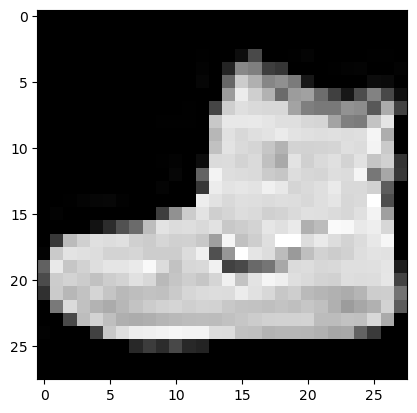

In [33]:
plt.imshow(X_train[0], cmap="gray")
print(y_train[0]);

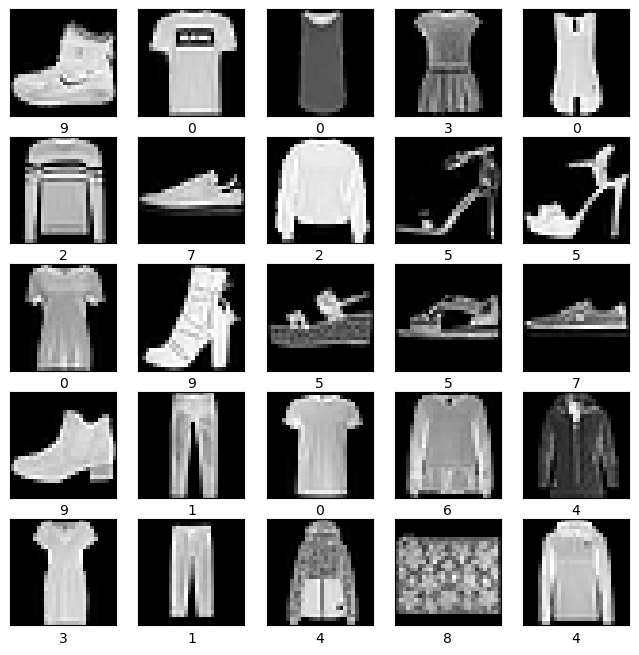

In [34]:
plt.figure(figsize=(8, 8))

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(X_train[i], cmap="gray")
  plt.xlabel(y_train[i])
  plt.xticks([])
  plt.yticks([]);

In [35]:
y_train

array([9, 0, 0, ..., 5, 1, 7], dtype=uint8)

In [36]:
X_train = X_train/255
X_valid = X_valid/255
X_test = X_test/255

# Experience with different layers
## Experience with two layers

In [37]:
# Use a flatten input layer and output layer

ann1 = models.Sequential([
                        layers.Flatten(input_shape=(28, 28)),
                        layers.Dense(10, activation='softmax')
])

ann1.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

C:\Users\hyz20\miniconda3\envs\gpu-env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
ann1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
ann1.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 358us/step - accuracy: 0.7292 - loss: 0.8103
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 343us/step - accuracy: 0.8326 - loss: 0.4831
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 347us/step - accuracy: 0.8477 - loss: 0.4476
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 345us/step - accuracy: 0.8499 - loss: 0.4355
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 331us/step - accuracy: 0.8558 - loss: 0.4177


In [40]:
info = ann1.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 467us/step - accuracy: 0.8589 - loss: 0.4080 - val_accuracy: 0.8440 - val_loss: 0.4415
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 412us/step - accuracy: 0.8619 - loss: 0.4026 - val_accuracy: 0.8513 - val_loss: 0.4277
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 424us/step - accuracy: 0.8613 - loss: 0.3971 - val_accuracy: 0.8430 - val_loss: 0.4491
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 411us/step - accuracy: 0.8616 - loss: 0.3996 - val_accuracy: 0.8560 - val_loss: 0.4160
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 413us/step - accuracy: 0.8633 - loss: 0.3931 - val_accuracy: 0.8540 - val_loss: 0.4204
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 419us/step - accuracy: 0.8665 - loss: 0.3888 - val_accuracy: 0.8530 - val_loss: 0.4209
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 416us/step - accuracy: 0.8644 - loss: 0.3857 - val_accuracy: 0.8525 - val_loss: 0.4261
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 413us/step - accuracy: 0.8682 -

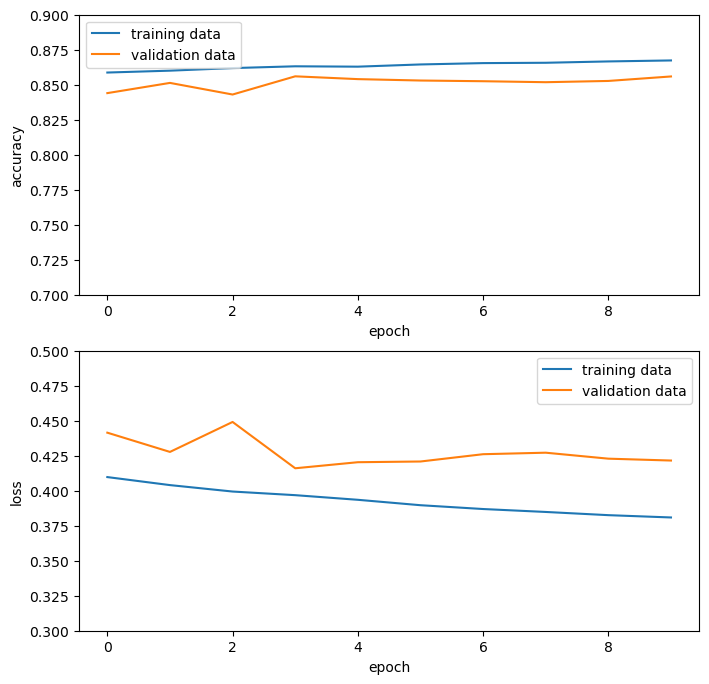

In [44]:
acc = info.history['accuracy']
val_acc = info.history['val_accuracy']

loss = info.history['loss']
val_loss = info.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.ylim([0.7,0.9])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.ylim([0.3,0.5])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [45]:
ann1.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - accuracy: 0.8478 - loss: 0.4367


[0.44763681292533875, 0.8456000089645386]

In [46]:
y_pred = ann1.predict(X_test)
y_pred[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step


array([1.9484902e-07, 1.6480290e-09, 8.8657107e-06, 6.0650154e-06,
       3.3731089e-06, 1.6675131e-01, 2.9999237e-05, 1.2249316e-01,
       6.2405821e-03, 7.0446634e-01], dtype=float32)

In [47]:
np.argmax(y_pred[0])

9

9


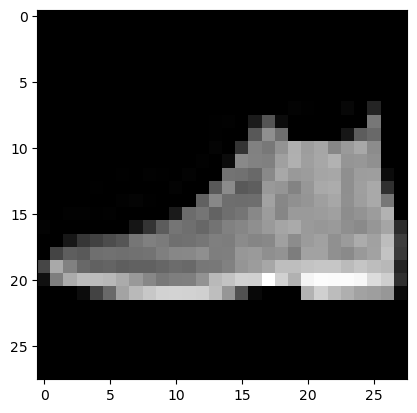

In [48]:
plt.imshow(X_test[0], cmap="gray")
print(y_test[0]);

In [49]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [50]:
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred_labels)
cm

array([[778,   1,  17,  58,   6,   1, 119,   0,  20,   0],
       [  2, 951,   6,  30,   5,   0,   4,   0,   2,   0],
       [ 12,   3, 760,  13, 121,   1,  76,   0,  14,   0],
       [ 19,   7,  11, 887,  36,   0,  30,   1,   9,   0],
       [  0,   0, 130,  40, 755,   0,  64,   0,  11,   0],
       [  0,   0,   0,   1,   0, 935,   0,  46,   3,  15],
       [114,   1, 139,  56, 109,   0, 556,   0,  25,   0],
       [  0,   0,   0,   0,   0,  33,   0, 956,   0,  11],
       [  3,   1,   8,   6,   2,   4,  10,   4, 962,   0],
       [  0,   0,   0,   0,   0,  17,   1,  66,   0, 916]], dtype=int64)

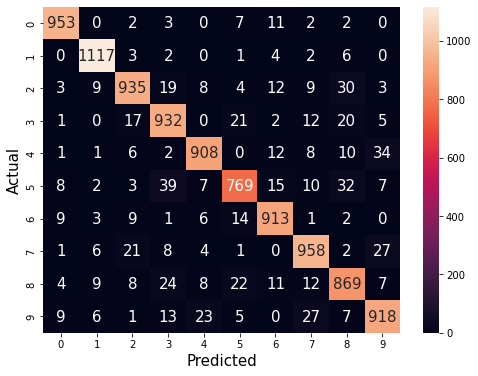

In [25]:
import seaborn as sn

plt.figure(figsize=(8, 6))

sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size":15})
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15);

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1000
           1       0.99      0.95      0.97      1000
           2       0.71      0.76      0.73      1000
           3       0.81      0.89      0.85      1000
           4       0.73      0.76      0.74      1000
           5       0.94      0.94      0.94      1000
           6       0.65      0.56      0.60      1000
           7       0.89      0.96      0.92      1000
           8       0.92      0.96      0.94      1000
           9       0.97      0.92      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.84     10000
weighted avg       0.85      0.85      0.84     10000



## Adding one hidden layer

In [56]:
# Use one hidden layer
from tensorflow.keras.callbacks import EarlyStopping
ann2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
ann2.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
# Fit the model with early stopping, adding validation data
ann2.fit(
    X_train, y_train, 
    epochs=50,  # Set a higher number of epochs; early stopping will handle the termination
    validation_data=(X_valid, y_valid), 
    callbacks=[early_stop] 
)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 738us/step - accuracy: 0.7664 - loss: 0.6762 - val_accuracy: 0.8514 - val_loss: 0.4177
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 695us/step - accuracy: 0.8626 - loss: 0.3902 - val_accuracy: 0.8687 - val_loss: 0.3723
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step - accuracy: 0.8731 - loss: 0.3522 - val_accuracy: 0.8677 - val_loss: 0.3680
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 687us/step - accuracy: 0.8803 - loss: 0.3207 - val_accuracy: 0.8720 - val_loss: 0.3496
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 691us/step - accuracy: 0.8900 - loss: 0.2994 - val_accuracy: 0.8795 - val_loss: 0.3349
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step - accuracy: 0.8964 - loss: 0.2817 - val_accuracy: 0.8584 - val_loss: 0.3959
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 682us/step - accuracy: 0.9012 - loss: 0.2657 - val_accuracy: 0.8805 - val_loss: 0.3354
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 687us/step - accuracy: 0.9066 -

In [57]:
ann2.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.8824 - loss: 0.3409


[0.34586280584335327, 0.8817999958992004]

In [58]:
ann2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

# Experimenting with different optimizer 
## Using RMsprop optimizer

In [61]:
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import RMSprop
ann_optm = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

ann_optm.compile(optimizer=RMSprop(learning_rate=0.001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


ann_optm.fit(
    X_train, y_train, 
    epochs=50,  # Set a higher number of epochs; early stopping will handle the termination
    validation_data=(X_valid, y_valid), 
    callbacks=[early_stop] 
)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 687us/step - accuracy: 0.7712 - loss: 0.6558 - val_accuracy: 0.8370 - val_loss: 0.4628
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 634us/step - accuracy: 0.8568 - loss: 0.3978 - val_accuracy: 0.8578 - val_loss: 0.3987
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 635us/step - accuracy: 0.8749 - loss: 0.3474 - val_accuracy: 0.8681 - val_loss: 0.3736
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - accuracy: 0.8872 - loss: 0.3229 - val_accuracy: 0.8702 - val_loss: 0.3678
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 624us/step - accuracy: 0.8881 - loss: 0.3096 - val_accuracy: 0.8797 - val_loss: 0.3604
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - accuracy: 0.8944 - loss: 0.2946 - val_accuracy: 0.8815 - val_loss: 0.3476
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 615us/step - accuracy: 0.8970 - loss: 0.2899 - val_accuracy: 0.8786 - val_loss: 0.3567
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 628us/step - accuracy: 0.9006 -

In [62]:
ann_optm.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.8713 - loss: 0.3679


[0.3745338022708893, 0.8698999881744385]

## Experimenting with  SGD optimizer with learninglate 0.001

In [64]:

ann_optm.compile(optimizer=optimizers.SGD(learning_rate=0.001), 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
ann_optm.fit(
    X_train, y_train, 
    epochs=50,  # Set a higher number of epochs; early stopping will handle the termination
    validation_data=(X_valid, y_valid), 
    callbacks=[early_stop] 
)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 579us/step - accuracy: 0.9215 - loss: 0.2165 - val_accuracy: 0.8930 - val_loss: 0.3091
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 538us/step - accuracy: 0.9219 - loss: 0.2189 - val_accuracy: 0.8936 - val_loss: 0.3093
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 548us/step - accuracy: 0.9209 - loss: 0.2174 - val_accuracy: 0.8931 - val_loss: 0.3094
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 548us/step - accuracy: 0.9191 - loss: 0.2220 - val_accuracy: 0.8936 - val_loss: 0.3093


In [65]:
ann_optm.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.8836 - loss: 0.3311


[0.33311727643013, 0.8849999904632568]

# Experimenting with different batch size and learning rate 
# First we try batch_size = 32 , learning rate = 0.003

In [70]:


ann_batch = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

ann_batch.compile(optimizer=optimizers.Adam(learning_rate=0.003), 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
ann_batch.fit(X_train, y_train, 
         epochs= 50, 
         batch_size=32,  # Set batch size to 32
         validation_data=(X_valid, y_valid),  
         callbacks=[early_stop] ) 



Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - accuracy: 0.7849 - loss: 0.6118 - val_accuracy: 0.8333 - val_loss: 0.4619
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 707us/step - accuracy: 0.8607 - loss: 0.3876 - val_accuracy: 0.8427 - val_loss: 0.4457
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 690us/step - accuracy: 0.8731 - loss: 0.3530 - val_accuracy: 0.8619 - val_loss: 0.3871
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step - accuracy: 0.8822 - loss: 0.3249 - val_accuracy: 0.8624 - val_loss: 0.3962
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step - accuracy: 0.8840 - loss: 0.3144 - val_accuracy: 0.8648 - val_loss: 0.3724
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 699us/step - accuracy: 0.8898 - loss: 0.3024 - val_accuracy: 0.8710 - val_loss: 0.3814
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 695us/step - accuracy: 0.8942 - loss: 0.2882 - val_accuracy: 0.8734 - val_loss: 0.3780
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 692us/step - accuracy: 0.8997 -

In [71]:
ann_batch.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.8731 - loss: 0.3723


[0.3777802884578705, 0.870199978351593]

## Then we try batch_size =256 ,learning rate 0.001

In [77]:
ann_batch.compile(optimizer=optimizers.Adam(learning_rate=0.003), 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
ann_batch.fit(X_train, y_train, 
         epochs= 50, 
         batch_size=256,  # Set batch size to 256
         validation_data=(X_valid, y_valid),  
         callbacks=[early_stop] ) 


Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9253 - loss: 0.1955 - val_accuracy: 0.8861 - val_loss: 0.3401
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9280 - loss: 0.1894 - val_accuracy: 0.8855 - val_loss: 0.3517
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9292 - loss: 0.1878 - val_accuracy: 0.8884 - val_loss: 0.3521


In [78]:
ann_batch.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.8839 - loss: 0.3650


[0.36964717507362366, 0.883400022983551]

In [ ]:
### Here we are trying to build an overfitted model where we can apply 

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential, datasets, regularizers
from keras.layers import Dense, Flatten, Dropout

In [2]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
# Load the Fashion MNIST dataset
fashion_mnist = datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train, X_valid = X_train_full[:50000], X_train_full[50000:]
y_train, y_valid = y_train_full[:50000], y_train_full[50000:]

In [5]:
X_train = X_train/255
X_valid = X_valid/255
X_test = X_test/255

In [6]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

/opt/anaconda3/envs/dev/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(x=X_train, y=y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7140 - loss: 0.8575 - val_accuracy: 0.8446 - val_loss: 0.4481
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8533 - loss: 0.4131 - val_accuracy: 0.8590 - val_loss: 0.3942
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8684 - loss: 0.3634 - val_accuracy: 0.8684 - val_loss: 0.3706
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.8762 - loss: 0.3406 - val_accuracy: 0.8717 - val_loss: 0.3711
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8860 - loss: 0.3115 - val_accuracy: 0.8700 - val_loss: 0.3543
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8924 - loss: 0.2987 - val_accuracy: 0.8795 - val_loss: 0.3395
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8935 - loss: 0.2860 - val_accuracy: 0.8815 - val_loss: 0.3290
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - accuracy: 0.8989 - loss: 0.2718 - val_accuracy

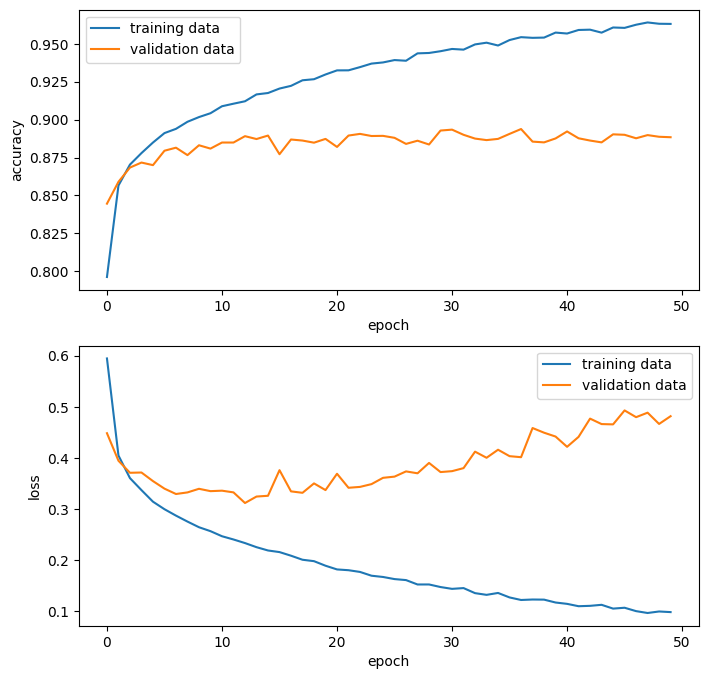

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

### the above is a clear case of overfitting. We will try to reduce the overfitting using the below regularization methods

#### l2 regularization

In [11]:
model4 = Sequential()
model4.add(Flatten(input_shape=(28,28)))
model4.add(Dense(128, activation='relu', kernel_regularizer= regularizers.l2(0.005)))
model4.add(Dense(64, activation='relu', kernel_regularizer= regularizers.l2(0.005)))
model4.add(Dense(32, activation='relu', kernel_regularizer= regularizers.l2(0.005)))
model4.add(Dense(10, activation='softmax'))

In [12]:
model4.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
history4 = model4.fit(x=X_train, y=y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6949 - loss: 1.9281 - val_accuracy: 0.8202 - val_loss: 0.9392
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8218 - loss: 0.8847 - val_accuracy: 0.8218 - val_loss: 0.8032
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8273 - loss: 0.7764 - val_accuracy: 0.8337 - val_loss: 0.7231
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8429 - loss: 0.6956 - val_accuracy: 0.8287 - val_loss: 0.6989
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8442 - loss: 0.6670 - val_accuracy: 0.8355 - val_loss: 0.6703
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8448 - loss: 0.6451 - val_accuracy: 0.8286 - val_loss: 0.6693
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8460 - loss: 0.6267 - val_accuracy: 0.8353 - val_loss: 0.6433
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8469 - loss: 0.6213 - val_accuracy: 0.

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


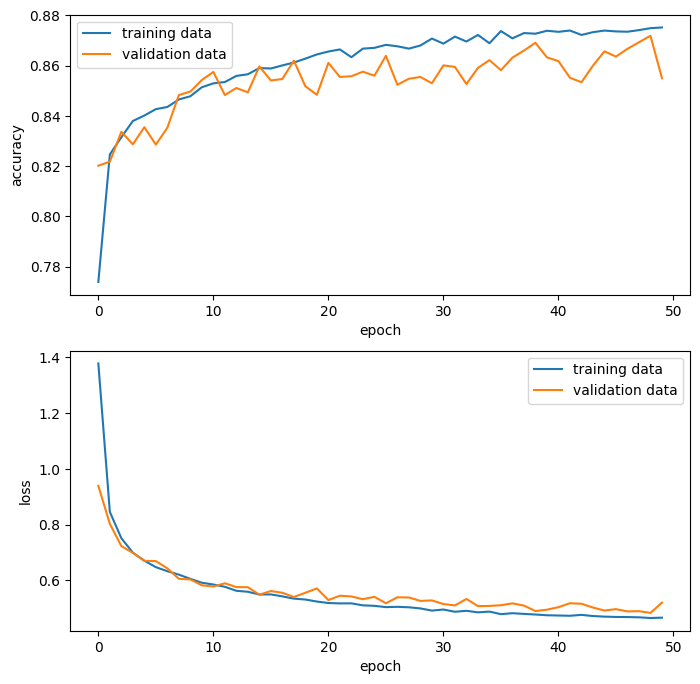

In [14]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']

loss = history4.history['loss']
val_loss = history4.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

### l1 regularizer

In [16]:
model6 = Sequential()
model6.add(Flatten(input_shape=(28,28)))
model6.add(Dense(128, activation='relu', kernel_regularizer= regularizers.l1(0.005)))
model6.add(Dense(64, activation='relu', kernel_regularizer= regularizers.l1(0.005)))
model6.add(Dense(32, activation='relu', kernel_regularizer= regularizers.l1(0.005)))
model6.add(Dense(10, activation='softmax'))

In [17]:
model6.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
history6 = model6.fit(x=X_train, y=y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5730 - loss: 9.5849 - val_accuracy: 0.7540 - val_loss: 1.7079
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.7542 - loss: 1.6102 - val_accuracy: 0.7647 - val_loss: 1.3940
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.7692 - loss: 1.3419 - val_accuracy: 0.7652 - val_loss: 1.2584
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.7737 - loss: 1.2229 - val_accuracy: 0.7792 - val_loss: 1.1778
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.7815 - loss: 1.1619 - val_accuracy: 0.7737 - val_loss: 1.1454
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.7853 - loss: 1.1278 - val_accuracy: 0.7628 - val_loss: 1.1339
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.7927 - loss: 1.0834 - val_accuracy: 0.7905 - val_loss: 1.0722
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.7960 - loss: 1.0566 - va

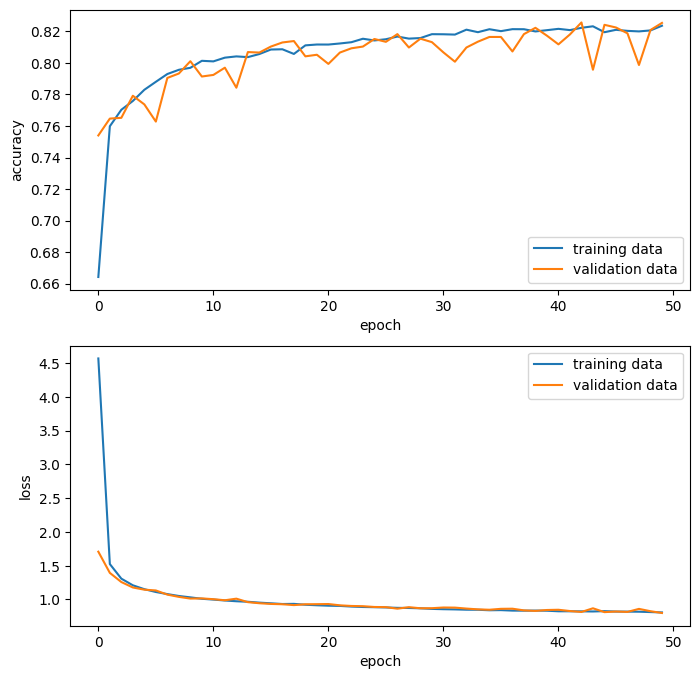

In [19]:
acc = history6.history['accuracy']
val_acc = history6.history['val_accuracy']

loss = history6.history['loss']
val_loss = history6.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

### drop out regularization

In [21]:
model10 = Sequential()
model10.add(Flatten(input_shape=(28,28)))
model10.add(Dense(128, activation='relu'))
model10.add(Dropout(rate=0.4))
model10.add(Dense(64, activation='relu'))
model10.add(Dropout(rate=0.3))
model10.add(Dense(32, activation='relu'))
model10.add(Dense(10, activation='softmax'))

In [22]:
model10.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
history10 = model10.fit(x=X_train, y=y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5730 - loss: 1.1828 - val_accuracy: 0.8288 - val_loss: 0.4781
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8062 - loss: 0.5464 - val_accuracy: 0.8468 - val_loss: 0.4188
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8309 - loss: 0.4742 - val_accuracy: 0.8551 - val_loss: 0.4002
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8408 - loss: 0.4487 - val_accuracy: 0.8576 - val_loss: 0.3802
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8451 - loss: 0.4321 - val_accuracy: 0.8659 - val_loss: 0.3662
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.8522 - loss: 0.4145 - val_accuracy: 0.8691 - val_loss: 0.3605
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.8591 - loss: 0.3959 - val_accuracy: 0.8738 - val_loss: 0.3517
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.8599 - loss: 0.3861 - val_accura

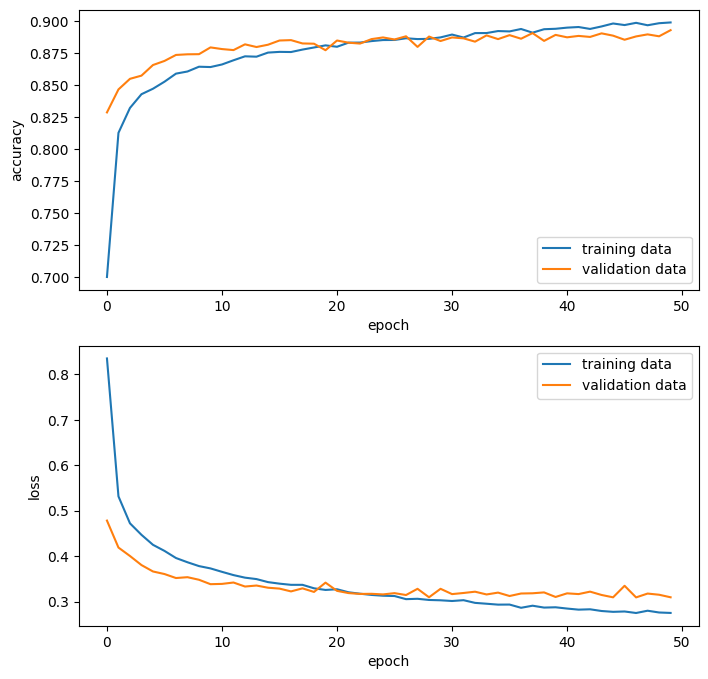

In [24]:
acc = history10.history['accuracy']
val_acc = history10.history['val_accuracy']

loss = history10.history['loss']
val_loss = history10.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

### Here we changing the number of neurons in the layers

In [25]:
model11 = Sequential()
model11.add(Flatten(input_shape=(28,28)))
model11.add(Dense(128, activation='relu'))
model11.add(Dense(10, activation='softmax'))

model11.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

history11 = model11.fit(x=X_train, y=y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 938us/step - accuracy: 0.7236 - loss: 0.8107 - val_accuracy: 0.8383 - val_loss: 0.4512
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - accuracy: 0.8512 - loss: 0.4278 - val_accuracy: 0.8621 - val_loss: 0.3956
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - accuracy: 0.8667 - loss: 0.3808 - val_accuracy: 0.8703 - val_loss: 0.3749
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.8746 - loss: 0.3482 - val_accuracy: 0.8689 - val_loss: 0.3735
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.8860 - loss: 0.3235 - val_accuracy: 0.8777 - val_loss: 0.3429
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.8868 - loss: 0.3141 - val_accuracy: 0.8717 - val_loss: 0.3537
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.8895 - loss: 0.3025 - val_accuracy: 0.8728 - val_loss: 0.3460
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.8991 - loss: 0.2841 - 

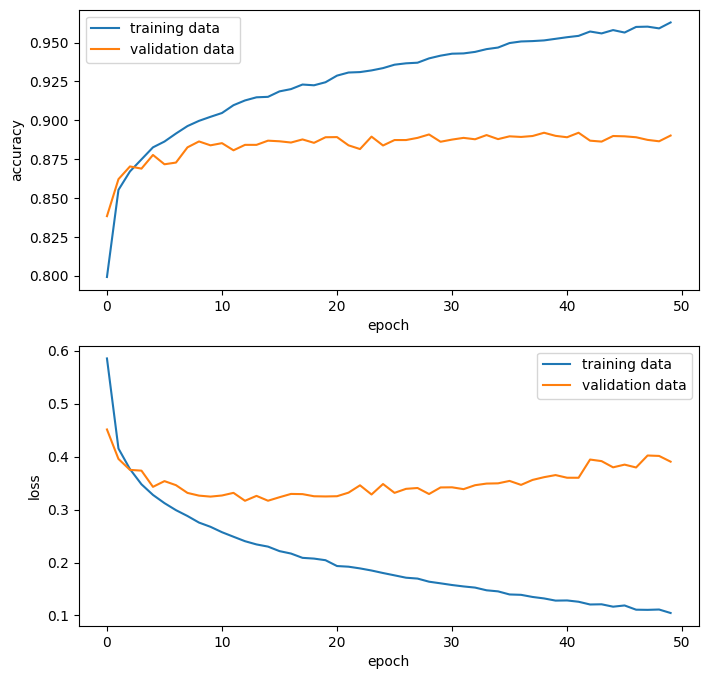

In [26]:
acc = history11.history['accuracy']
val_acc = history11.history['val_accuracy']

loss = history11.history['loss']
val_loss = history11.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [27]:
model12 = Sequential()
model12.add(Flatten(input_shape=(28,28)))
model12.add(Dense(64, activation='relu'))
model12.add(Dense(10, activation='softmax'))

model12.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

history12 = model12.fit(x=X_train, y=y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.7133 - loss: 0.8578 - val_accuracy: 0.8299 - val_loss: 0.4806
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.8449 - loss: 0.4459 - val_accuracy: 0.8543 - val_loss: 0.4241
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.8615 - loss: 0.3969 - val_accuracy: 0.8503 - val_loss: 0.4257
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.8685 - loss: 0.3768 - val_accuracy: 0.8628 - val_loss: 0.3893
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.8746 - loss: 0.3545 - val_accuracy: 0.8642 - val_loss: 0.3914
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.8782 - loss: 0.3405 - val_accuracy: 0.8731 - val_loss: 0.3604
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.8834 - loss: 0.3231 - val_accuracy: 0.8745 - val_loss: 0.3555
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.8859 - loss: 0.3225 - 

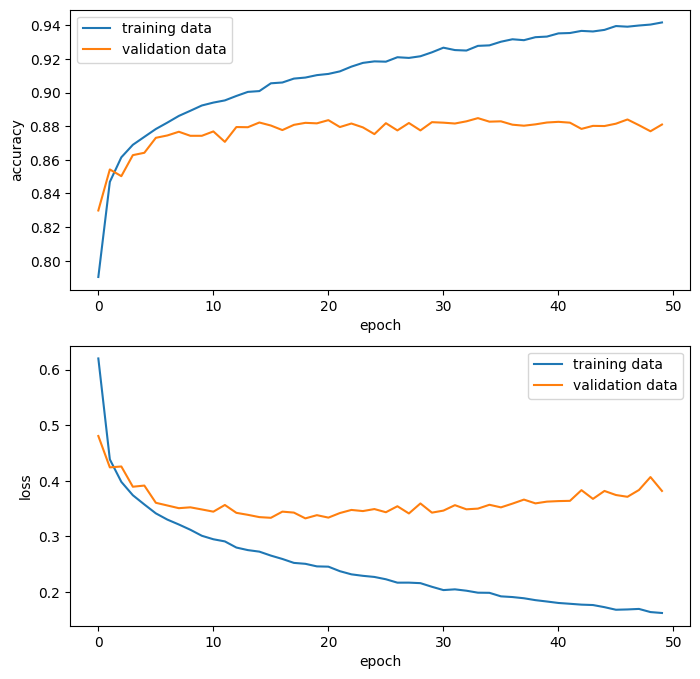

In [28]:
acc = history12.history['accuracy']
val_acc = history12.history['val_accuracy']

loss = history12.history['loss']
val_loss = history12.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

# Experimenting with L1 regulizer

In [84]:
from tensorflow.keras import models, layers, regularizers

ann_L1 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu', 
                 kernel_regularizer=regularizers.l1(0.001)),  # L1 regularization on the first layer
    layers.Dense(10, activation='softmax')  # Output layer, regularization not commonly needed here
])
ann_L1.compile(optimizer=optimizers.Adam(learning_rate=0.003), 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
ann_L1.fit(X_train, y_train, 
         epochs= 20, 
         batch_size=256,  # Set batch size to 256
         validation_data=(X_valid, y_valid),  
         verbose = 1 ) 


Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7160 - loss: 2.6690 - val_accuracy: 0.8019 - val_loss: 0.9334
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8020 - loss: 0.8966 - val_accuracy: 0.7978 - val_loss: 0.8754
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8040 - loss: 0.8417 - val_accuracy: 0.7815 - val_loss: 0.8360
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8116 - loss: 0.7719 - val_accuracy: 0.8067 - val_loss: 0.7671
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8199 - loss: 0.7519 - val_accuracy: 0.8203 - val_loss: 0.7255
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8159 - loss: 0.7304 - val_accuracy: 0.8235 - val_loss: 0.7085
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8304 - loss: 0.7014 - val_accuracy: 0.8246 - val_loss: 0.7042
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8301 - loss: 0.6951 - val_accuracy: 0.

In [85]:
ann_L1.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.8452 - loss: 0.6254


[0.6328870058059692, 0.8402000069618225]

# Experimenting with adding L2 regulizer

In [90]:
ann_L2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu', 
                 kernel_regularizer=regularizers.l2(0.001)),  # L1 regularization on the first layer
    layers.Dense(10, activation='softmax')  # Output layer, regularization not commonly needed here
])
 
ann_L2.compile(optimizer=optimizers.Adam(learning_rate=0.001), 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
ann_L2.fit(X_train, y_train, 
         epochs= 15, 
         batch_size=256,  # Set batch size to 32
         validation_data=(X_valid, y_valid),  
         verbose=1) 

Epoch 1/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6940 - loss: 1.1059 - val_accuracy: 0.8340 - val_loss: 0.6407
Epoch 2/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8453 - loss: 0.5993 - val_accuracy: 0.8493 - val_loss: 0.5648
Epoch 3/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8538 - loss: 0.5371 - val_accuracy: 0.8478 - val_loss: 0.5362
Epoch 4/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8614 - loss: 0.5013 - val_accuracy: 0.8621 - val_loss: 0.4934
Epoch 5/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8645 - loss: 0.4751 - val_accuracy: 0.8568 - val_loss: 0.4883
Epoch 6/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8687 - loss: 0.4575 - val_accuracy: 0.8657 - val_loss: 0.4551
Epoch 7/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8755 - loss: 0.4334 - val_accuracy: 0.8696 - val_loss: 0.4492
Epoch 8/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8757 - loss: 0.4256 - val_accuracy: 0.

In [91]:
ann_L2.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - accuracy: 0.8688 - loss: 0.4173


[0.4214073121547699, 0.8705000281333923]

# Experimenting with dropout 

In [106]:
# Use dropout and batch normalization

from keras.layers import Dropout, BatchNormalization

ann3 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation=None),
    layers.BatchNormalization(),
    layers.Activation('relu'),  # Apply ReLU after batch normalization
    layers.Dropout(0.3),    
    layers.Dense(10, activation='softmax')
])

ann3.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
ann3.fit(X_train, y_train, 
         epochs= 12, 
         batch_size=256,  # Set batch size to 256
         validation_data=(X_valid, y_valid),  
         verbose=1) 

Epoch 1/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7072 - loss: 0.8493 - val_accuracy: 0.8433 - val_loss: 0.4567
Epoch 2/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8450 - loss: 0.4451 - val_accuracy: 0.8632 - val_loss: 0.3897
Epoch 3/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8600 - loss: 0.3948 - val_accuracy: 0.8461 - val_loss: 0.4158
Epoch 4/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8672 - loss: 0.3698 - val_accuracy: 0.8649 - val_loss: 0.3698
Epoch 5/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8757 - loss: 0.3433 - val_accuracy: 0.8711 - val_loss: 0.3586
Epoch 6/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8824 - loss: 0.3292 - val_accuracy: 0.8753 - val_loss: 0.3461
Epoch 7/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8885 - loss: 0.3119 - val_accuracy: 0.8734 - val_loss: 0.3527
Epoch 8/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8880 - loss: 0.3070 - val_accuracy: 0.

In [107]:
ann3.evaluate(X_valid, y_valid)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.8714 - loss: 0.3610


[0.35294416546821594, 0.8756999969482422]

# Experimeting with weight and bias initiliztion

In [108]:
ann_init = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation=None,
                 kernel_initializer='he_normal', bias_initializer='zeros'), # adding initilaization
    layers.BatchNormalization(),  # Add batch normalization
    layers.Activation('relu'),  # Apply ReLU after batch normalization
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax',
                kernel_initializer='glorot_uniform', bias_initializer='ones')
])
ann_init.compile(optimizer=optimizers.Adam(learning_rate=0.003), 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
ann_init.fit(X_train, y_train, 
         epochs= 20, 
         batch_size=256,  # Set batch size to 32
         validation_data=(X_valid, y_valid),  
         verbose=1) 


Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7611 - loss: 0.6811 - val_accuracy: 0.8221 - val_loss: 0.5008
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8570 - loss: 0.3994 - val_accuracy: 0.8586 - val_loss: 0.3952
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8726 - loss: 0.3536 - val_accuracy: 0.8679 - val_loss: 0.3633
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8802 - loss: 0.3254 - val_accuracy: 0.8661 - val_loss: 0.3667
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8892 - loss: 0.3048 - val_accuracy: 0.8629 - val_loss: 0.3871
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8962 - loss: 0.2859 - val_accuracy: 0.8752 - val_loss: 0.3450
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8994 - loss: 0.2742 - val_accuracy: 0.8727 - val_loss: 0.3517
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9011 - loss: 0.2668 - val_accuracy: 0.

In [109]:
ann_init.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.8775 - loss: 0.3955


[0.39163294434547424, 0.8794000148773193]